Lets use a file data.csv for this assignment in which we are provided with a data of 1000 employees in the company along with their age, salary, Joining Date, Department and Perfomance Score. So lets first inspect the data.

In [217]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("data.csv")

# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Age                1000 non-null   int64  
 2   Salary             1000 non-null   float64
 3   Joining_Date       1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Performance_Score  945 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


,Name,Age,Salary,Joining_Date,Department,Performance_Score
0,Employee_0,58,42509.64,2010-01-01,IT,2.0
1,Employee_1,48,130852.76,2010-01-02,IT,4.0
2,Employee_2,34,139282.34,2010-01-03,Marketing,1.0
3,Employee_3,27,44737.29,2010-01-04,IT,4.0
4,Employee_4,40,58308.72,2010-01-05,IT,1.0


As we can see we have some missing values in column of Performance_Score. So let us first fill these cells with the mean of performance score.

In [218]:
# Check and remove duplicate records
df.drop_duplicates(inplace=True)

print(df['Performance_Score'].mean())


2.8380952380952382


In [219]:
# Handle missing values in Performance_Score (impute with mean)
df['Performance_Score'].fillna(3, inplace=True)

#Removing outliers in Age and Salary
q1= df[['Age', 'Salary']].quantile(0.25)
q3= df[['Age', 'Salary']].quantile(0.75)
#Calculate IQR
IQR=q3-q1
#Define Lower and Upper Bound
LB= q1-1.5*IQR
UB= q3+1.5*IQR

# Filter out outliers
df = df[~((df[['Age', 'Salary']] < LB) | (df[['Age', 'Salary']] > UB)).any(axis=1)]

#Standardizing the data in Department by removing exxtra spaces and making the all data in same case type
df['Department']=df['Department'].str.strip().str.title()


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1000 non-null   object 
 1   Age                1000 non-null   int64  
 2   Salary             1000 non-null   float64
 3   Joining_Date       1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Performance_Score  1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


Now lets move further with Univariate Analysis
- Determining the count of employee according to their age and salary.
- Determining the count of people according to their perfomance score.
- Determining the number of employee in each department. 


In [220]:
import matplotlib.pyplot as plt


In [221]:

#Summary Statistics of Age Distribution
df['Age'].describe()


count    1000.000000
mean       39.991000
std        11.780055
min        20.000000
25%        30.000000
50%        41.000000
75%        50.250000
max        59.000000
Name: Age, dtype: float64

In [222]:

#Summary Statistics of Salary Distribution
df['Salary'].describe()


count      1000.00000
mean      90372.08915
std       34139.43811
min       30028.50000
25%       60496.87000
50%       91750.17000
75%      119783.29250
max      149922.42000
Name: Salary, dtype: float64

In [223]:

#Summary Statistics of Performance Score
df['Performance_Score'].describe()

count    1000.000000
mean        2.847000
std         1.080166
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Performance_Score, dtype: float64

Text(0.5, 1.0, 'Performance Score Distribution')

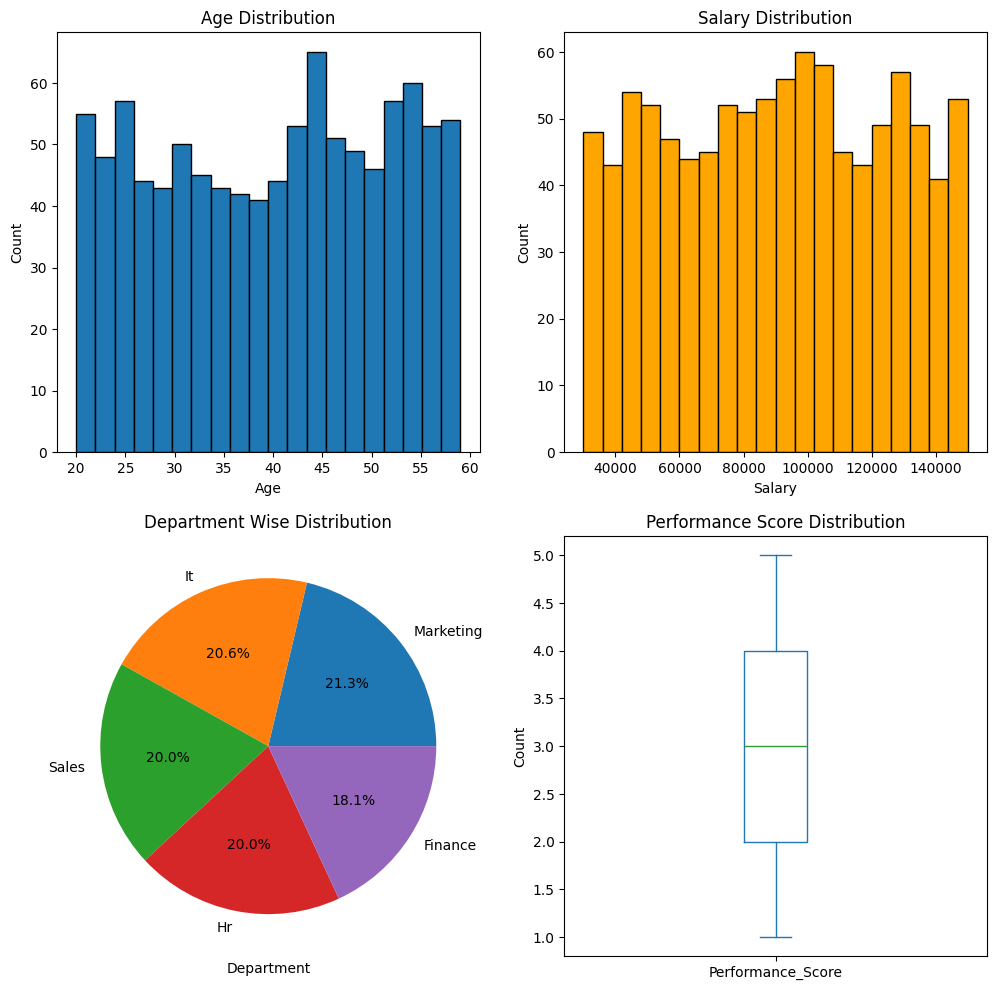

In [224]:
fig, axes = plt.subplots(2, 2, figsize=[12,12])

# First plot the Age vs count graph for the employees
df['Age'].plot(kind='hist', bins= 20, edgecolor='black',ax=axes[0,0] )
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Age Distribution')


# Plot the Salary vs count graph for the employees
df['Salary'].plot(kind='hist', bins= 20, edgecolor='black', color='orange',ax=axes[0,1] )
axes[0,1].set_xlabel('Salary')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Salary Distribution')

# Plot the count of employees in each department
df['Department'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=axes[1,0] )
axes[1,0].set_xlabel('Department')
axes[1,0].set_ylabel(' ')
axes[1,0].set_title('Department Wise Distribution')

# Plot the box plot of Perfromance score
df['Performance_Score'].plot(kind='box', ax=axes[1,1])
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Performance Score Distribution')

Here we are done with the Univariate Analysis and we can infer:
- Maximum number of employees working are from nearly 45 years.
- Maximum employees are working at salary of about 100000.
- Maximum employees are working in Marketing departement.

Now we move on with BIVARIATE ANALYSIS. We will see:
 - Correlation matrix of Age, Salary and Performance score
 - How the nature of salary varies for people of different age group.
 - How performance score varies according to the age.
 - How salary varies according to performance score.
 - How performance score varies in each department.

In [225]:
import seaborn as sns

In [226]:
# Correlation Matrix for Age, Salary and Perfromance Score
df[['Age','Salary','Performance_Score']].corr()

,Age,Salary,Performance_Score
Age,1.00000,0.004900,0.002960
Salary,0.00490,1.000000,0.042537
Performance_Score,0.00296,0.042537,1.000000


Text(0.5, 1.0, 'Department-wise Employee Count for Different Performance Scores')

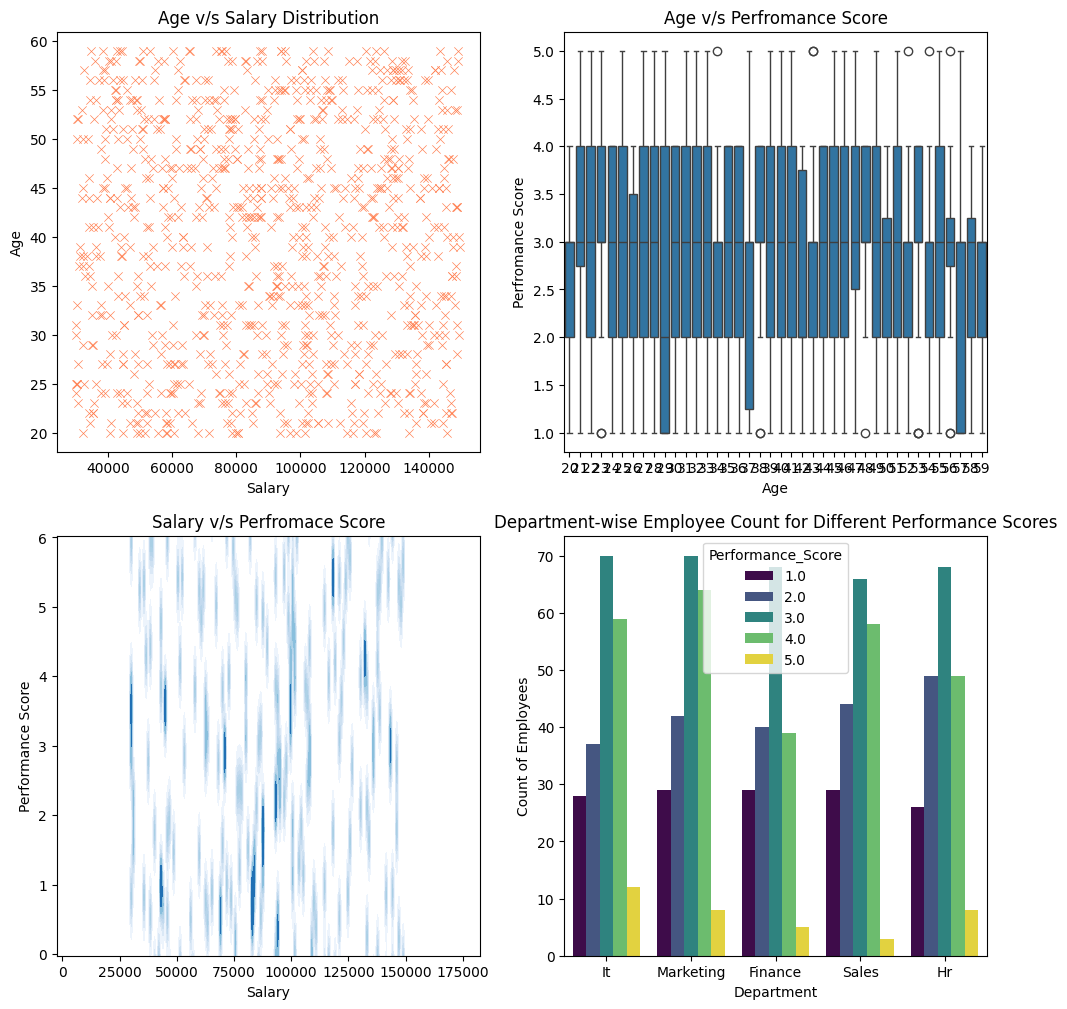

In [227]:
fig1, axes= plt.subplots(2, 2, figsize=(12,12) )

# Scatar Plot between Salary and Age
sns.scatterplot(x=df['Salary'],y=df['Age'], marker= 'x', color='coral',ax=axes[0,0])
axes[0,0].set_xlabel("Salary")
axes[0,0].set_ylabel("Age")
axes[0,0].set_title("Age v/s Salary Distribution")

# Box Plot of performance score at different ages
sns.boxplot(x=df['Age'],y=df['Performance_Score'],ax=axes[0,1])
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("Perfromance Score")
axes[0,1].set_title("Age v/s Perfromance Score")

# Density graph of performance score at differnet salary
sns.kdeplot(x=df['Salary'], y=df['Performance_Score'], cmap="Blues", fill= True,ax=axes[1,0])
axes[1,0].set_xlabel("Salary")
axes[1,0].set_ylabel("Performance Score")
axes[1,0].set_title("Salary v/s Perfromace Score")

# Count of people in different department with different performance score
sns.countplot(x=df['Department'], hue=df['Performance_Score'], palette='viridis', ax=axes[1,1])
axes[1,1].set_xlabel("Department")
axes[1,1].set_ylabel("Count of Employees")
axes[1,1].set_title("Department-wise Employee Count for Different Performance Scores")

Here we are done with the Bivariate Analysis. We infer that:
- There is no particular relation in age and salary.
- People with performance score more than 3 have comparatively more salary.
- There are maximum people with performance score in each department.

Now we will move on with the Multivariate Analysis. We will look at:
- Pairplot to analyse about age, salarya and performance score simultaneously.
- Heatmap to visualise to correlation between age, salary and performance score.
- Bar plot for salary distribution in different department for different performance score.
- Violin plor for age distribution in different department for different performance score.

Text(0.5, 1.0, 'Pair Plot')

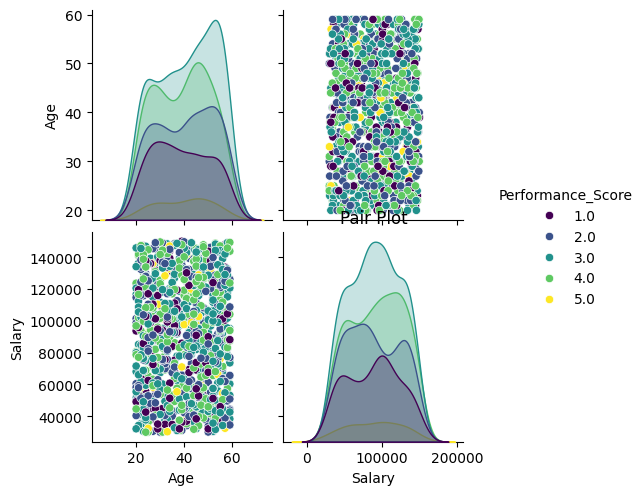

In [228]:
sns.pairplot(df, hue='Performance_Score', palette='viridis')
plt.title("Pair Plot")


Text(0.5, 1.0, 'Correlation Heatmap')

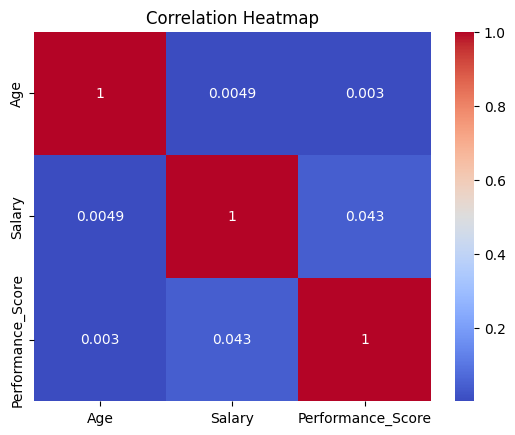

In [229]:

sns.heatmap(df[['Age','Salary','Performance_Score']].corr(),cmap='coolwarm',annot=True)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Salary Distribution Across Departments for Different Performance Scores')

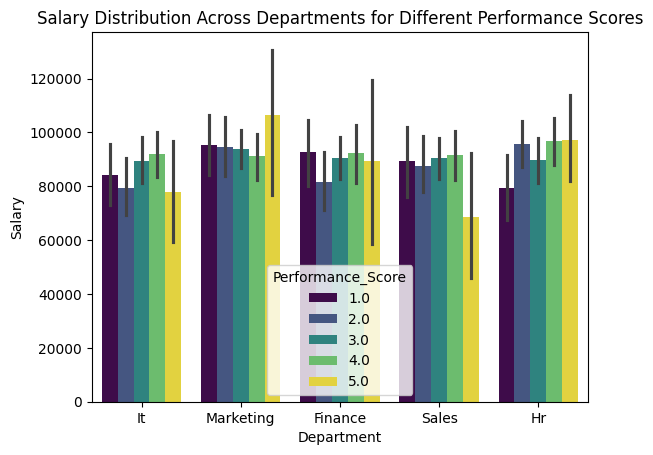

In [230]:
sns.barplot(x="Department", y="Salary", hue="Performance_Score", data=df, palette="viridis")
plt.title("Salary Distribution Across Departments for Different Performance Scores")

Text(0.5, 1.0, 'Age Distribution Across Performance Scores and Departments')

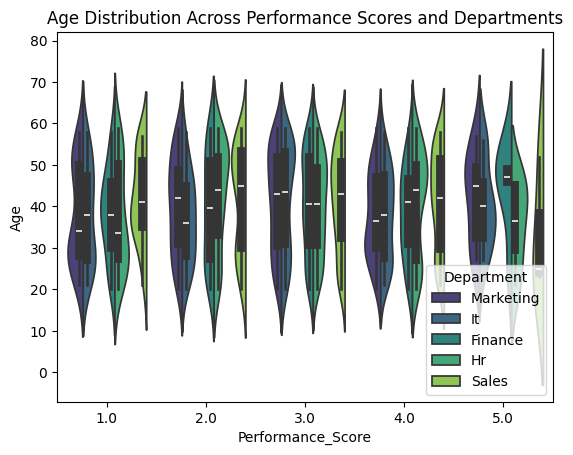

In [231]:
sns.violinplot(x=df['Performance_Score'], y=df['Age'], hue=df['Department'], split=True, palette="viridis")
plt.title("Age Distribution Across Performance Scores and Departments")

Here we are done with our multivariate analysis. We infer from vaiuos plots:
- Pair Plot: A pair plot helped visualize interactions between numerical variables for different performance score.

- Heatmap: A heatmap of the correlation matrix provided insights into relationships between numerical variables.

- Grouped Bar Chart: Analyzed salary distribution across departments and performance scores, showing variations in pay among different categories.

- Violin Plot: Revealed that Age distribution varies significantly across different performance scores.